In [1]:
import xarray as xr
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
from pprint import pprint
import os
from datetime import datetime
import calendar
import pandas as pd
from scipy import stats
import cartopy.crs as ccrs
import cartopy
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.dates as mdates
import textwrap
from matplotlib.ticker import FormatStrFormatter


/fs/site3/eccc/crd/ccrn/users/sah002/envs/sah002_env/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


0.0


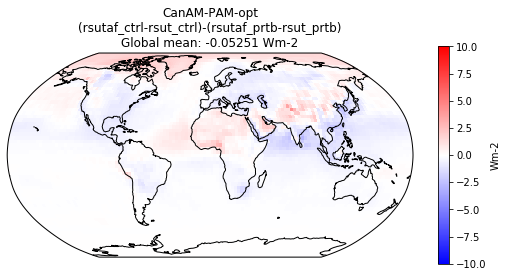

In [2]:
#rsut - TOA Outgoing Shortwave Radiation
#rsutaf - TOA Outgoing Aerosol-Free Shortwave Radiation (Flux corresponding to rsut resulting from aerosol-free call to radiation, following Ghan (ACP, 2013))
#rsutcsaf - TOA Outgoing Clear-Sky, Aerosol-Free Shortwave Radiation (Flux corresponding to rsutcs resulting from aerosol-free call to radiation, following Ghan (ACP, 2013))
#rtmt - Net Downward Radiative Flux at Top of Model : I.e., at the top of that portion of the atmosphere where dynamics are explicitly treated by the model. This is reported only if it differs from the net downward radiative flux at the top of the atmosphere.
#rsdt - Shortwave radiation incident at the top of the atmosphere (fso)

data_dir = '/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/'
var_dict = {'rtmt':'Amon',
            'rsut':'Amon',
            'rsutaf':'AERmon',
            'rsutcsaf':'AERmon'}

#control
control_run = 'anr-ccnact-erf-001'
control = {}
for var, table in var_dict.items():
    control[var] =xr.open_mfdataset(data_dir+control_run+'/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-'+control_run+'/piClim-aer/r1i1p1f1/'+table+'/'+var+'/gn/v20190429/*.nc')[var]
control['fso']   =xr.open_mfdataset(data_dir+control_run+'/data/nccrip_files/fso/*.nc')['fso']
areacella        =xr.open_mfdataset(data_dir+control_run+'/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-'+control_run+'/piClim-aer/r1i1p1f1/fx/areacella/gn/v20190429/*.nc')['areacella']   
control['wts']   = (areacella/areacella.max().values).values
control['title'] = 'PAM control run (AMAP emissions)'

#perturbed
perturbed_run ='anr-ccnact-erf-prtb-001'
perturbed={}
for var, table in var_dict.items():
    perturbed[var] =xr.open_mfdataset(data_dir+perturbed_run+'/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-'+perturbed_run+'/piClim-aer/r1i1p1f1/'+table+'/'+var+'/gn/v20190429/*.nc')[var]
perturbed['fso']   =xr.open_mfdataset(data_dir+perturbed_run+'/data/nccrip_files/fso/*.nc')['fso']
areacella          =xr.open_mfdataset(data_dir+perturbed_run+'/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-'+perturbed_run+'/piClim-aer/r1i1p1f1/fx/areacella/gn/v20190429/*.nc')['areacella']   
perturbed['wts']   = (areacella/areacella.max().values).values
perturbed['title'] ='PAM nobc run (AMAP emissions)'

print((control['wts']-perturbed['wts']).sum())

#plotting  
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=.5)

ctrl = (control['rsutaf']   - control['rsut'])
prtb = (perturbed['rsutaf'] - perturbed['rsut'])

data_1 = (ctrl-prtb).mean("time")

units  = 'Wm-2'
#if runi == '2':
#    title  = 'CanAM-PAM (AMAP emissions)\n(rsutaf_ctrl-rsut_ctrl)-(rsutaf_prtb-rsut_prtb)\nGlobal mean: '+str(np.round((data_1*control['wts']).mean(('lat','lon')).values,decimals=5))+' Wm-2'
#else:
#    title  = 'CanAM-Bulk\n(rsutaf_ctrl-rsut_ctrl)-(rsutaf_prtb-rsut_prtb)\nGlobal mean: '+str(np.round((data_1*control['wts']).mean(('lat','lon')).values,decimals=5))+' Wm-2'
title  = 'CanAM-PAM-opt\n(rsutaf_ctrl-rsut_ctrl)-(rsutaf_prtb-rsut_prtb)\nGlobal mean: '+str(np.round((data_1*control['wts']).mean(('lat','lon')).values,decimals=5))+' Wm-2'
lon = data_1.lon
data_1p, lon = add_cyclic_point(data_1, coord=data_1.lon)
lat = data_1.lat
ax1 = plt.subplot(1,2,1,projection=ccrs.Robinson()) 
im1 = ax1.pcolor(lon, lat, data_1p, cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
im1.set_clim(-10,10) 
cb1 = fig.colorbar(im1, ax=ax1)
cb1.ax.set_ylabel(units)
ax1.set_title(title)
ax1.coastlines()


In [ ]:
#scratch space

fig = plt.figure(figsize=(20,20))
rows = 2
cols = 1

print((abs(control['fso']['fso']-perturbed_total['fso']['fso'])).sum().values)
print('**********')


print((abs(control['fso']['fso']-perturbed_total['fso']['fso'])).sum().values)
#print((control['fso']['fso']-perturbed_bc['fso']['fso']).sum().values)
#print((control['fso']['fso']-perturbed_oc['fso']['fso']).sum().values)
#print((control['fso']['fso']-perturbed_s['fso']['fso']).sum().values)



print('**********')

runids ={'erf-ctrla-001': control,
         'erf-total-001': perturbed_total,}

ax = plt.subplot(rows,cols,1)
for runid, data in runids.items():
    print((data['fso']['fso']).sum(('lon','time')).values)
    ds = (data['fso']['fso']).mean(('lat','lon'))
    ax.plot(ds.time, ds, label = runid)
ax.set_xlabel('Year')
ax.set_ylabel('FSO')
ax.legend()

ax = plt.subplot(rows,cols,2)
for runid, data in runids.items():
    ds = data['fso']['fso'].mean(('lat','lon'))
    ds2 = (data['rsut']['rsut'].mean(('lat','lon')))
    ax.plot(ds.time, ds-ds2, label = runid)
ax.set_xlabel('Year')
ax.set_ylabel('FSO')
ax.legend()


In [3]:
vmin, vmax = -10, 10

rtmt_c     = control['rtmt']      
rsut_c     = control['rsut']     
rsutaf_c   = control['rsutaf']   
rsutcsaf_c = control['rsutcsaf'] 

for run_dict in [perturbed]:
    rtmt_p     = run_dict['rtmt']      
    rsut_p     = run_dict['rsut']     
    rsutaf_p   = run_dict['rsutaf']   
    rsutcsaf_p = run_dict['rsutcsaf']  
    title      = run_dict['title']
    
    total_ERF                = -1*(rtmt_p['rtmt']-rtmt_c['rtmt'])
    total_ERF_sw             = (rsut_p['rsut']-rsut_c['rsut'])
    direct_radiative_forcing = ((rsut_p['rsut']-rsutaf_p['rsutaf'])-(rsut_c['rsut']-rsutaf_c['rsutaf']))
    cloud_radiative_forcing  = ((rsutaf_p['rsutaf']-rsutcsaf_p['rsutcsaf'])-(rsutaf_c['rsutaf']-rsutcsaf_c['rsutcsaf']))
    surface_albedo_forcing   = (rsutcsaf_p['rsutcsaf']-rsutcsaf_c['rsutcsaf'])
    sum_ghan_forcing         = direct_radiative_forcing + cloud_radiative_forcing + surface_albedo_forcing


    #ERF plots

    ERF_plots = [
    [total_ERF_sw,             'Wm-2', 'ERFtotal\n'+title+'\nGlobal mean: '+str(np.round(total_ERF_sw.mean().values,decimals=4))+' Wm-2\n[Perturbed - Control, 10 year run]'],                      # + rsut_p['rsut'].long_name + ' (' +  rsut_p['rsut'].original_name + ')\n[Perturbed - Control, 10 year run]'],
    [direct_radiative_forcing, 'Wm-2', 'ERFari (Ghan method)\n'+title+'\nGlobal mean: '+str(np.round(direct_radiative_forcing.mean().values,decimals=4))+' Wm-2\n[Perturbed - Control, 10 year run]'],     #' + rsut_p['rsut'].long_name + ' (' +  rsut_p['rsut'].original_name + ')' + ' - ' + rsutaf_p['rsutaf'].long_name  + ' (' +  rsutaf_p['rsutaf'].original_name + ')' + '\n[Perturbed - Control, 10 year run]'],
    [cloud_radiative_forcing,  'Wm-2', 'ERFaci (Ghan method)\n'+title+'\nGlobal mean: '+str(np.round(cloud_radiative_forcing.mean().values,decimals=4))+' Wm-2\n[Perturbed - Control, 10 year run]'],      #' + rsutaf_p['rsutaf'].long_name + ' (' +  rsutaf_p['rsutaf'].original_name + ')' + ' - ' + rsutcsaf_p['rsutcsaf'].long_name + ' (' +  rsutcsaf_p['rsutcsaf'].original_name + ')' + '\n[Perturbed - Control, 10 year run]'],
    [surface_albedo_forcing,   'Wm-2', 'ERFalbedo (Ghan method)\n'+title+'\nGlobal mean: '+str(np.round(surface_albedo_forcing.mean().values,decimals=4))+' Wm-2\n[Perturbed - Control, 10 year run]'],       #' + rsutcsaf_p['rsutcsaf'].long_name + ' (' +  rsutcsaf_p['rsutcsaf'].original_name + ')' + '\n[Perturbed - Control, 10 year run]'],
    ]

    plot_rows = 2
    plot_cols = 2
    plot_cntr = 1

    fig = plt.figure(figsize=(20,10))
    fig.subplots_adjust(hspace=.5)
    for plot in ERF_plots:
        data_1 = plot[0].mean("time")
        units  = plot[1]
        title  = plot[2]

        print(data_1.mean("lat").mean("lon").values)

        lon = data_1.lon
        data_1p, lon = add_cyclic_point(data_1, coord=data_1.lon)
        lat = data_1.lat


        ax1 = plt.subplot(plot_rows,plot_cols,plot_cntr,projection=ccrs.Robinson()) 
        im1 = ax1.pcolor(lon, lat, data_1p, cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
        im1.set_clim(vmin,vmax) 
        cb1 = fig.colorbar(im1, ax=ax1)
        cb1.ax.set_ylabel(units)
        ax1.set_title(title)
        ax1.coastlines()
        plot_cntr += 1


    save_path = '/home/sah002/public_html/ERF_1_BC.png'
    #plt.savefig(save_path,bbox_inches='tight')

    
    
    


KeyError: 'rtmt'

In [ ]:
vmin, vmax = -10, 10

plot_rows = 2
plot_cols = 3
plot_cntr = 1

fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=.5)

for run_dict in [control,perturbed_total]:
    rsut     = run_dict['rsut']     
    rsutaf   = run_dict['rsutaf']
    titled   = run_dict['title']
    
    data_1 = (rsutaf['rsutaf']-rsut['rsut']).mean("time")
    units  = 'Wm-2'
    title  = 'rsutaf-rsut\n'+titled+'\nGlobal mean: '+str(np.round(data_1.mean().values,decimals=2))+' Wm-2\n[10 year run]'

    lon = data_1.lon
    data_1p, lon = add_cyclic_point(data_1, coord=data_1.lon)
    lat = data_1.lat


    ax1 = plt.subplot(plot_rows,plot_cols,plot_cntr,projection=ccrs.Robinson()) 
    im1 = ax1.pcolor(lon, lat, data_1p, cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
    im1.set_clim(vmin,vmax) 
    cb1 = fig.colorbar(im1, ax=ax1)
    cb1.ax.set_ylabel(units)
    ax1.set_title(title)
    ax1.coastlines()
    plot_cntr += 1


    save_path = '/home/sah002/public_html/ERF_1_BC.png'
    #plt.savefig(save_path,bbox_inches='tight')


    

   
    
    



In [ ]:

vmin, vmax = -10, 10

rtmt_c     = control['rtmt']      
rsut_c     = control['rsut']     
rsutaf_c   = control['rsutaf']   
rsutcsaf_c = control['rsutcsaf']
title      = control['title']

    
total_ERF                = -1*(rtmt_c['rtmt'])
total_ERF_sw             = (rsut_c['rsut'])
direct_radiative_forcing = ((rsut_c['rsut']-rsutaf_c['rsutaf']))
cloud_radiative_forcing  = ((rsutaf_c['rsutaf']-rsutcsaf_c['rsutcsaf']))
surface_albedo_forcing   = (rsutcsaf_c['rsutcsaf'])
sum_ghan_forcing         = direct_radiative_forcing + cloud_radiative_forcing + surface_albedo_forcing


#ERF plots

ERF_plots = [
[total_ERF_sw,             'Wm-2', 'ERFtotal\n'+title+'\nGlobal mean: '+str(np.round(total_ERF_sw.mean().values,decimals=2))+' Wm-2\n[Perturbed - Control, 10 year run]'],                      # + rsut_p['rsut'].long_name + ' (' +  rsut_p['rsut'].original_name + ')\n[Perturbed - Control, 10 year run]'],
[direct_radiative_forcing, 'Wm-2', 'ERFari (Ghan method)\n'+title+'\nGlobal mean: '+str(np.round(direct_radiative_forcing.mean().values,decimals=2))+' Wm-2\n[Perturbed - Control, 10 year run]'],     #' + rsut_p['rsut'].long_name + ' (' +  rsut_p['rsut'].original_name + ')' + ' - ' + rsutaf_p['rsutaf'].long_name  + ' (' +  rsutaf_p['rsutaf'].original_name + ')' + '\n[Perturbed - Control, 10 year run]'],
[cloud_radiative_forcing,  'Wm-2', 'ERFaci (Ghan method)\n'+title+'\nGlobal mean: '+str(np.round(cloud_radiative_forcing.mean().values,decimals=2))+' Wm-2\n[Perturbed - Control, 10 year run]'],      #' + rsutaf_p['rsutaf'].long_name + ' (' +  rsutaf_p['rsutaf'].original_name + ')' + ' - ' + rsutcsaf_p['rsutcsaf'].long_name + ' (' +  rsutcsaf_p['rsutcsaf'].original_name + ')' + '\n[Perturbed - Control, 10 year run]'],
[surface_albedo_forcing,   'Wm-2', 'ERFalbedo (Ghan method)\n'+title+'\nGlobal mean: '+str(np.round(surface_albedo_forcing.mean().values,decimals=2))+' Wm-2\n[Perturbed - Control, 10 year run]'],       #' + rsutcsaf_p['rsutcsaf'].long_name + ' (' +  rsutcsaf_p['rsutcsaf'].original_name + ')' + '\n[Perturbed - Control, 10 year run]'],
]

plot_rows = 2
plot_cols = 2
plot_cntr = 1

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=.5)
for plot in ERF_plots:
    data_1 = plot[0].mean("time")
    units  = plot[1]
    title  = plot[2]

    print(data_1.mean("lat").mean("lon").values)

    lon = data_1.lon
    data_1p, lon = add_cyclic_point(data_1, coord=data_1.lon)
    lat = data_1.lat


    ax1 = plt.subplot(plot_rows,plot_cols,plot_cntr,projection=ccrs.Robinson()) 
    im1 = ax1.pcolor(lon, lat, data_1p, cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
    im1.set_clim(vmin,vmax) 
    cb1 = fig.colorbar(im1, ax=ax1)
    cb1.ax.set_ylabel(units)
    ax1.set_title(title)
    ax1.coastlines()
    plot_cntr += 1


save_path = '/home/sah002/public_html/ERF_1_BC.png'
#plt.savefig(save_path,bbox_inches='tight')


    
    


In [ ]:
#sum plots
sum_plots = [
[total_ERF_sw,     'Wm-2', 'ERFtotal\nGlobal mean: '+str(np.round(total_ERF_sw.mean().values,decimals=2))+' Wm-2\n[Perturbed - Control, 10 year run]'],     #' + rsut_p['rsut'].long_name + ' (' +  rsut_p['rsut'].original_name + ')\n[Perturbed - Control, 10 year run]'],
[sum_ghan_forcing, 'Wm-2', 'Sum of ERFari, ERFaci, and ERFalbedo\nGlobal mean: '+str(np.round(sum_ghan_forcing.mean().values,decimals=2))+' Wm-2\n[Perturbed - Control, 10 year run]'],
[(total_ERF_sw-sum_ghan_forcing), 'Wm-2', 'ERFtotal - Sum of ERFs'],
]

plot_rows = 2
plot_cols = 2
plot_cntr = 1


fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=.5)
for plot in sum_plots:
    data_1 = plot[0].mean("time")
    units  = plot[1]
    title  = plot[2]
    
    lon = data_1.lon
    data_1p, lon = add_cyclic_point(data_1, coord=data_1.lon)
    lat = data_1.lat


    ax1 = plt.subplot(plot_rows,plot_cols,plot_cntr,projection=ccrs.Robinson()) 
    im1 = ax1.pcolormesh(lon, lat, data_1p, cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
    im1.set_clim(vmin,vmax) 
    if plot_cntr == 4 :
        im1.set_clim(-100,100) 
    cb1 = fig.colorbar(im1, ax=ax1)
    cb1.ax.set_ylabel(units)
    ax1.set_title(title)
    ax1.coastlines()
    plot_cntr += 1
    
save_path = '/home/sah002/public_html/ERF_2_BC.png'
#plt.savefig(save_path,bbox_inches='tight')


In [ ]:
fig = plt.figure(figsize=(20,10))


data_1= total_ERF_sw.mean('time')
lon = data_1.lon
data_1p, lon = add_cyclic_point(data_1, coord=data_1.lon)
lat = data_1.lat


ax1 = plt.subplot(1,2,1,projection=ccrs.Robinson()) 
im1 = ax1.pcolormesh(lon, lat, data_1p, cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
im1.set_clim(vmin,vmax) 
cb1 = fig.colorbar(im1, ax=ax1)
cb1.ax.set_ylabel(units)
ax1.set_title(title)
ax1.coastlines()

ax2 = plt.subplot(1,2,2,projection=ccrs.Robinson()) 
im2 = ax2.imshow(data_1p, cmap=plt.cm.bwr, transform=ccrs.PlateCarree())
im2.set_clim(vmin,vmax) 
cb2 = fig.colorbar(im2, ax=ax2)
cb2.ax.set_ylabel(units)
ax2.set_title(title)
ax2.coastlines()
